Calcule a área da superfície de uma semi-esfera.

Seja a equação: $x^2 +y^2 +z^2 = r^2$, com $r^2 = 100$.



In [1]:
# importa e checa a versão utilizada do Sympy

import sympy as sp
sp.__version__

'1.7.1'

In [2]:
# imprime as equações de maneira 'matemática'

sp.init_printing()

In [3]:
# definção das váriaveis

simbolos = ['theta', 'phi', 'x', 'y', 'z', 'i', 'j', 'k']
theta, phi, x, y, z, i, j, k = sp.symbols(simbolos)

r = 10  # raiz quadrada de 100

x = r*sp.sin(phi)*sp.cos(theta)
y = r*sp.sin(phi)*sp.sin(theta)
z = r*sp.cos(phi)

In [4]:
# cria matrix com as coordenadas paremetrizas na função esférica 

sigma = sp.Matrix([x,y,z])
sigma

⎡10⋅sin(φ)⋅cos(θ)⎤
⎢                ⎥
⎢10⋅sin(φ)⋅sin(θ)⎥
⎢                ⎥
⎣   10⋅cos(φ)    ⎦

In [5]:
# calcula as derivadas de sigma em relação a theta e phi

dsigma_dtheta = sp.diff(sigma,theta)
dsigma_dphi = sp.diff(sigma,phi)

In [6]:
dsigma_dphi

⎡10⋅cos(φ)⋅cos(θ)⎤
⎢                ⎥
⎢10⋅sin(θ)⋅cos(φ)⎥
⎢                ⎥
⎣   -10⋅sin(φ)   ⎦

In [7]:
dsigma_dtheta

⎡-10⋅sin(φ)⋅sin(θ)⎤
⎢                 ⎥
⎢10⋅sin(φ)⋅cos(θ) ⎥
⎢                 ⎥
⎣        0        ⎦

In [8]:
# método alternativo para o cálculo do produto vetorial

produto_vetorial = sp.Matrix([[i,j,k],
                              [dsigma_dphi[0],dsigma_dphi[1],dsigma_dphi[2]],
                              [dsigma_dtheta[0],dsigma_dtheta[1],dsigma_dtheta[2]]]).det()
produto_vetorial

In [9]:
# imprime as componentes do determinante

print(produto_vetorial)

100*i*sin(phi)**2*cos(theta) + 100*j*sin(phi)**2*sin(theta) + 100*k*sin(phi)*sin(theta)**2*cos(phi) + 100*k*sin(phi)*cos(phi)*cos(theta)**2


In [10]:
# copiar na mão os termos em função de i,j e k (é... ainda não sei como pegar isso automaticamente só com o sympy)

f1 = 100*(sp.sin(phi)**2)*(sp.cos(theta))
f2 = 100*(sp.sin(phi)**2)*(sp.sin(theta))
f3 = 100*(sp.sin(phi))*(sp.sin(theta)**2)*(sp.cos(phi)) + 100*(sp.sin(phi))*(sp.cos(phi))*(sp.cos(theta)**2)

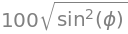

In [11]:
# cálcula a norma do produto vetorial das derivadas parciais

norma_vetorial = sp.sqrt(f1**2 + f2**2 + f3**2)
norma_vetorial = sp.simplify(norma_vetorial)

norma_vetorial

In [12]:
# calcula a integral dupla

area_total = sp.integrate(norma_vetorial,(theta,0,2*sp.pi),(phi,0,sp.pi/2))


In [13]:
#resultado final

area_total